## Homework 4 Coding Exercises

### 1).

We examine competitive neural networks and test the theory developed in question 2.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sns.set()

def pPlane(system, x_lower, x_upper, y_lower, y_upper, line=None, 
            planes=(1,1), args=[None], fsize=(20,10)):
    
    u1 = np.linspace(x_lower, x_upper, 20)
    u2 = np.linspace(y_lower, y_upper,20)

    U1, U2 = np.meshgrid(u1, u2)

    x, y = np.zeros(U1.shape), np.zeros(U2.shape)

    ni, nj = U1.shape
    
    fig, ax = plt.subplots(nrows=planes[0], ncols=planes[1], figsize=fsize)
    
    for arg in range(len(args)):
    
        for i in range(ni):
            for j in range(nj):
                if args[0] == None:
                    yprime = system([U1[i,j],U2[i,j]],0)
                else:
                    yprime = system([U1[i,j],U2[i,j]],0, args[arg])

                x[i,j] = yprime[0]
                y[i,j] = 0.3*yprime[1]

        if args[0] == None:
#             ax.quiver(U1,U2,x,y,color='b')

            if line != None:
                ax.plot(u1, line(u1), color='k', linewidth=3.0)

            ax.set_xlim([x_lower, x_upper])
            ax.set_ylim([y_lower, y_upper])
            
        else:
#             ax[arg].quiver(U1,U2,x,y,color='b')

            if line != None:
                ax[arg].plot(u1, line(u1), color='k', linewidth=3.0)

            ax[arg].set_xlim([x_lower, x_upper])
            ax[arg].set_ylim([y_lower, y_upper])
    
    return fig, ax

### a).
We will first numerically solve the system of ODE's found in problem 2 with initial conditions $u_1(0)=u_2(0)=\frac{1}{2}$. As well, the input current is $I_1(t) = 1-H(t-1)$ and $I_2(t) = 0$.

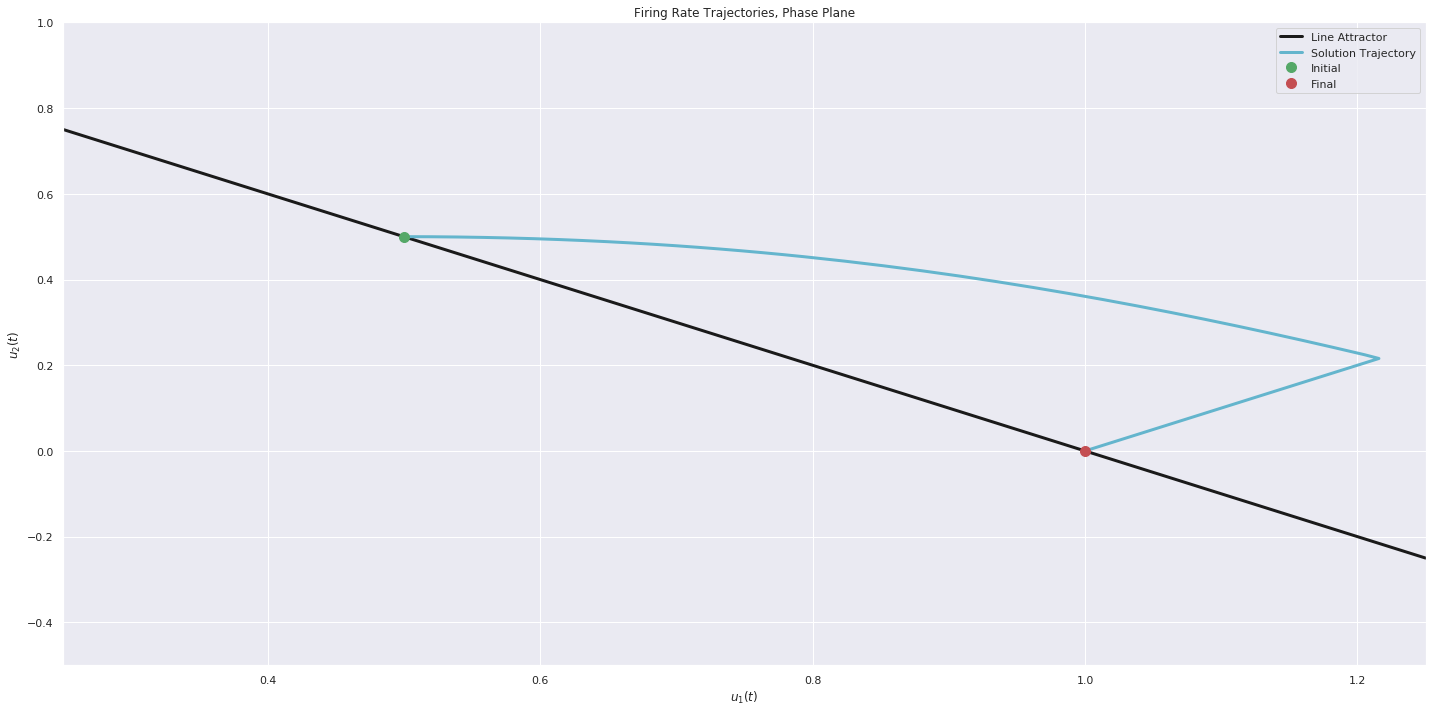

In [2]:
#Setting the ODE
def attractor(u1):
    return 1 - u1

def I_1(t):
    return 1 - np.heaviside(t-1, 1)

def d_u1_1(Y, t): #ODE 1
    u1, u2 = Y
    
    return 1 - u1 - u2 + I_1(t)

def d_u2_1(Y, t): #ODE 2
    u1, u2 = Y
    
    return 1 - u1 - u2 + 0

def ddt_system_1(Y, t): #Returns the system
    return [d_u1_1(Y,t), d_u2_1(Y,t)]


#Solving the ODE
tvec = np.linspace(0,20,1000)
trj = odeint(ddt_system_1, [0.5,0.5], tvec) 

#Setting up the Phase Plane
#Generating phase plane
fig, ax = pPlane(ddt_system_1, 0.25, 1.25, -0.5, 1, attractor, fsize=(20,10))

#Plotting
ax.plot(trj[:,0], trj[:,1], 'c', linewidth=3.0)
ax.plot(trj[0,0], trj[0,1], 'go', markersize=10)
ax.plot(trj[999,0], trj[999,1], 'ro', markersize=10)

ax.set_title('Firing Rate Trajectories, Phase Plane')
ax.set_xlabel('$u_1(t)$')
ax.set_ylabel('$u_2(t)$')

ax.legend(['Line Attractor', 'Solution Trajectory', 'Initial', 'Final'])
plt.tight_layout()

In the plots above we can see that our numerical results match with our analysis from problem 2b. Starting at $u_1(0)=u_2(0)=\frac{1}{2}$ the trajectory is perturbed by the input $I_1(t)$ while $t<1$. When $t=1$ this input shuts off and the trajectory is pulled back into the line attractor. Specifically we see that the trajectory gets pulled into the point $u_1=1,\;\;u_2=0$ which is exactly what we expect the long term value to be from the analysis. 

### b).
Now we consider the case in which $I_1(t) = 1-H(t-1) = I_2(t)$

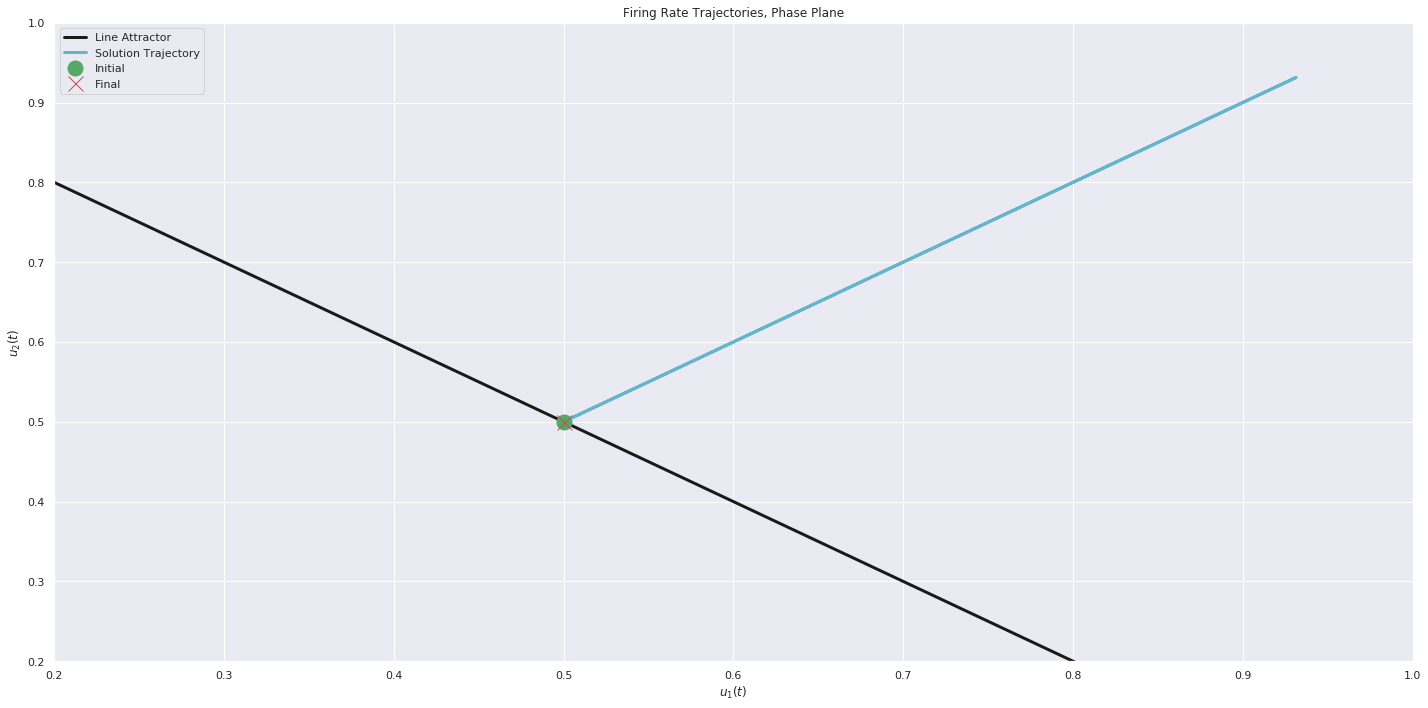

In [75]:
#Setting the ODE
def attractor(u1):
    return 1 - u1

def I_1(t):
    return 1 - np.heaviside(t-1, 1)

def d_u1_2(Y, t): #ODE 1
    u1, u2 = Y
    
    return 1 - u1 - u2 + I_1(t)

def d_u2_2(Y, t): #ODE 2
    u1, u2 = Y
    
    return 1 - u1 - u2 + I_1(t)

def ddt_system_2(Y, t): #Returns the system
    return [d_u1_2(Y,t), d_u2_2(Y,t)]


#Solving the ODE
tvec = np.linspace(0,20,1000)
trj = odeint(ddt_system_2, [0.5,0.5], tvec) 

#Setting up the Phase Plane
#Generating phase plane
fig, ax = pPlane(ddt_system_2, 0.2, 1, 0.2, 1, line=attractor)

#Plotting
ax.plot(trj[:,0], trj[:,1], 'c', linewidth=3.0)

ax.plot(trj[0,0], trj[0,1], 'go', markersize=15)
ax.plot(trj[999,0], trj[999,1], 'rx', markersize=15)

ax.set_title('Firing Rate Trajectories, Phase Plane')
ax.set_xlabel('$u_1(t)$')
ax.set_ylabel('$u_2(t)$')

ax.legend(['Line Attractor', 'Solution Trajectory', 'Initial', 'Final'])
plt.tight_layout()

In the plots above we see the trajectory is perturbed from the line attractor by the input $I_1(t)$ and $I_2(t)$ when $t<1$ and then gets sucked back in when the inputs shut of at $t=1$. This is seen in the plots where the start and end point of the trajectory are the same. We see that the behavior seen here is significantly different than the behavior see when $I_2(t)=0$. This is because $u_1$ and $u_2$ represent the mean firing rate of different neural populations. When the input to each is the exact same the competition between them will be equally matched. This means the long term fixed point will not change as neither population wins out.

### c).
Here we consider the non-linear competitive neural network from 2c. We numerically simulate this system of ODE's for three sets of parameters:

$\gamma=1,\;\;u_1(0)=1,\;\;u_2(0)=0$


$\gamma=3,\;\;u_1(0)=\frac{3}{5},\;\;u_2(0)=\frac{2}{5}$


$\gamma=3,\;\;u_1(0)=\frac{2}{5},\;\;u_2(0)=\frac{3}{5}$

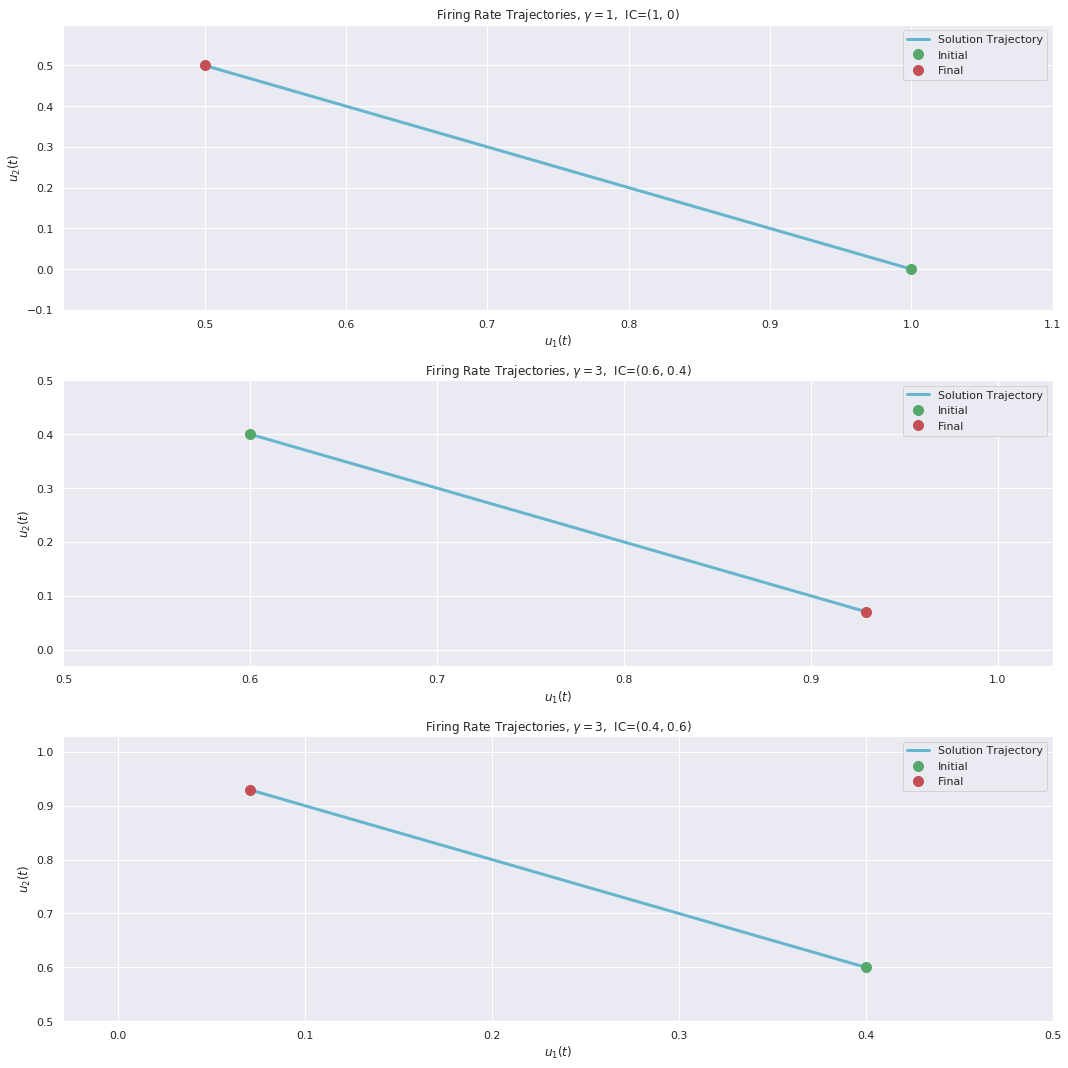

In [74]:
#NOTE: Plot second two on same plot with larger axis, and the first one by itself with larger axis.

gamma_vec = [1, 3, 3]
IC_vec = [(1,0), (3/5,2/5), (2/5,3/5)]

#Setting up the ODE
def d_u1_3(Y, t, g):
    u1, u2 = Y
    
    return -u1 + ( 1/ (1 + np.exp(-g*(1-2*u2))) )
    
def d_u2_3(Y, t, g):
    u1, u2 = Y
    
    return -u2 + ( 1/ (1 + np.exp(-g*(1-2*u1))) )
    
def ddt_system_3(Y, t, g):
    return [d_u1_3(Y, t, g), d_u2_3(Y, t, g)]

#Setting up the Phase Plane
#Generating phase plane
# fig, ax = pPlane(ddt_system_3, 0, 0.5, 0, 2, planes=(3,1), args=gamma_vec, fsize=(15,15))
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

#Solving the ODE
for i in range(len(gamma_vec)):
    tvec = np.linspace(0,20,1000)
    trj = odeint(ddt_system_3, IC_vec[i], tvec, args=(gamma_vec[i],)) 

    #Plotting
    ax[i].plot(trj[:,0], trj[:,1], 'c', linewidth=3.0)

    ax[i].set_xlim(min(trj[:,0])-0.1, max(trj[:,0])+0.1)
    ax[i].set_ylim(min(trj[:,1])-0.1, max(trj[:,1])+0.1)

    ax[i].plot(trj[0,0], trj[0,1], 'go', markersize=10)
    ax[i].plot(trj[999,0], trj[999,1], 'ro', markersize=10)

    ax[i].set_title('Firing Rate Trajectories, $\gamma=$' + str(gamma_vec[i]) + ',  IC=' + str(IC_vec[i]))
    ax[i].set_xlabel('$u_1(t)$')
    ax[i].set_ylabel('$u_2(t)$')

    ax[i].legend(['Solution Trajectory', 'Initial', 'Final'])

plt.tight_layout()

From our previous analysis in problem 2c we expect that for $\gamma>\gamma_c=1$ the network is competitive. In the first plot we see that for $\gamma=1$ the solution trajectory tends towards the fixed point $(\frac{1}{2}, \frac{1}{2})$. This shows that the network is not competitive as the fixed point is stable and solutions are attracted to it. However, in the next two plots we see that for $\gamma=3$ the fixed point is no longer stable. Solutions starting near this fixed point are repelled. Importantly, the location of the initial condition determines where the solution is repelled to. In the second plot the solution starts to the right and below the fixed point and gets repelled to the right and down. In the third plot we see the solution starts to the left and above the fixed point and gets repelled to the left and up. The second plot corresponds to population 1 winning, and the third plot corresponds to population 2 winning.